sensor_00   -0.912453
sensor_01   -0.672664
sensor_02   -0.791340
sensor_03   -0.646236
sensor_04   -0.916251
sensor_05   -0.434675
sensor_06   -0.851497
sensor_07   -0.813105
sensor_08   -0.776232
sensor_09   -0.758571
sensor_10   -0.872526
sensor_11   -0.823495
sensor_12   -0.758787
sensor_13   -0.269843
sensor_14    0.091686
sensor_16    0.089174
sensor_17    0.074688
sensor_18    0.065763
sensor_19    0.088124
sensor_20    0.087021
sensor_21    0.084428
sensor_22    0.079461
sensor_23    0.095611
sensor_24    0.098794
sensor_25    0.078188
sensor_26    0.076001
sensor_27    0.032568
sensor_28    0.203300
sensor_29    0.053315
sensor_30    0.114708
sensor_31    0.158500
sensor_32    0.136392
sensor_33    0.104581
sensor_34   -0.039534
sensor_35    0.091169
sensor_36   -0.019252
sensor_37    0.068008
sensor_38   -0.360624
sensor_39   -0.024335
sensor_40   -0.375201
sensor_41   -0.103536
sensor_42    0.007369
sensor_43   -0.118501
sensor_44   -0.235747
sensor_45   -0.202554
sensor_46 

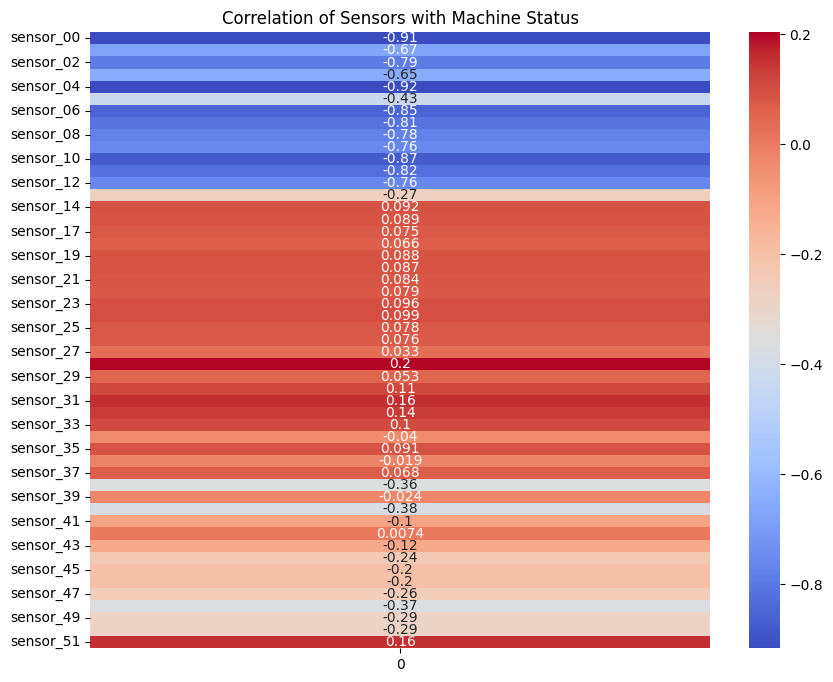

                 timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17155  2018-04-12 21:55:00   0.000000   53.34201  52.821180  43.402775   
17156  2018-04-12 21:56:00   0.000000   53.55902  52.777770  43.402775   
17157  2018-04-12 21:57:00   0.000000   53.55902  52.777770  43.402775   
17158  2018-04-12 21:58:00   0.000000   52.77777  52.690970  43.402770   
17159  2018-04-12 21:59:00   0.000000   52.60416  52.734370  43.446180   
...                    ...        ...        ...        ...        ...   
166511 2018-07-25 15:11:00   0.310880   46.48438  51.171870  46.527775   
166512 2018-07-25 15:12:00   0.304977   46.39757  51.085070  46.527770   
166513 2018-07-25 15:13:00   0.303993   46.31076  51.085070  46.484380   
166514 2018-07-25 15:14:00   0.301042   46.18055  51.041664  46.484380   
166515 2018-07-25 15:15:00   0.301042   46.09375  50.998260  46.440970   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
17155   202.526031   49.79289   3.219039

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe
# Convert timestamp to datetime
df = pd.read_csv('data/sensor_cleaned.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Encode machine_status numerically if it's categorical
status_mapping = {'NORMAL': 0, 'BROKEN': 1 }
df['machine_status'] = df['machine_status'].map(status_mapping)

# Calculate correlations
correlations = df.drop(columns=['timestamp']).corrwith(df['machine_status']).drop('machine_status')
print(correlations)

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm')
plt.title('Correlation of Sensors with Machine Status')
plt.show()

broken_sensors = df[df['machine_status'] == 1]
print(broken_sensors)

recover_sensors = df[df['machine_status'] == 2]
print(recover_sensors)

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import featurex

# Assuming 'data' is your DataFrame
data = pd.read_csv('data/sensor_engineered.csv')

# Convert timestamp to datetime
# data['timestamp'] = pd.to_datetime(data['timestamp'])

# Assuming you have a DataFrame 'data' with sensor readings
X = data[featurex.sensors]  # sensor_columns should contain only sensor feature columns

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01)  # contamination is an estimate of the proportion of anomalies

# Train the model
iso_forest.fit(X_scaled)

# Predict anomalies
anomalies = iso_forest.predict(X_scaled)
data['anomaly'] = anomalies

# Anomalies will be marked with -1, normal data with 1
data['anomaly'] = data['anomaly'].map({1: 0, -1: 1})

print(data['anomaly'].head())


# Count the number of anomalies
anomaly_count = data['anomaly'].value_counts()

# Assuming anomaly_count is your series with the counts
print("Anomaly Counts")
print(anomaly_count)

# Print the counts for normal data points and anomalies
print("\nNumber of Normal Data Points:", anomaly_count[0])  # Normal points are marked as 0
print("Number of Anomalies:", anomaly_count[1])  # Anomalies are marked as 1


KeyError: "['sensor_12_lag_3', 'sensor_05_std_1h', 'sensor_10_max_1h', 'sensor_12_min_1h', 'sensor_12_lag_1', 'sensor_12_max_1h', 'sensor_12_mean_1h', 'sensor_11_max_1h', 'sensor_13_lag_3', 'sensor_00_min_1h', 'sensor_10_lag_1', 'sensor_10_lag_3'] not in index"

machine_status       1.000000
sensor_05_std_1h    -0.057737
sensor_13_lag_3     -0.269603
sensor_13           -0.269847
sensor_12_min_1h    -0.736998
sensor_12_lag_3     -0.758106
sensor_12_lag_1     -0.758585
sensor_12           -0.758787
sensor_12_mean_1h   -0.763703
sensor_12_max_1h    -0.768555
sensor_11_max_1h    -0.822902
sensor_10_lag_3     -0.871785
sensor_10_lag_1     -0.872317
sensor_10           -0.872528
sensor_10_max_1h    -0.879131
sensor_00_min_1h    -0.894130
sensor_00           -0.912453
sensor_04           -0.916251
Name: machine_status, dtype: float64


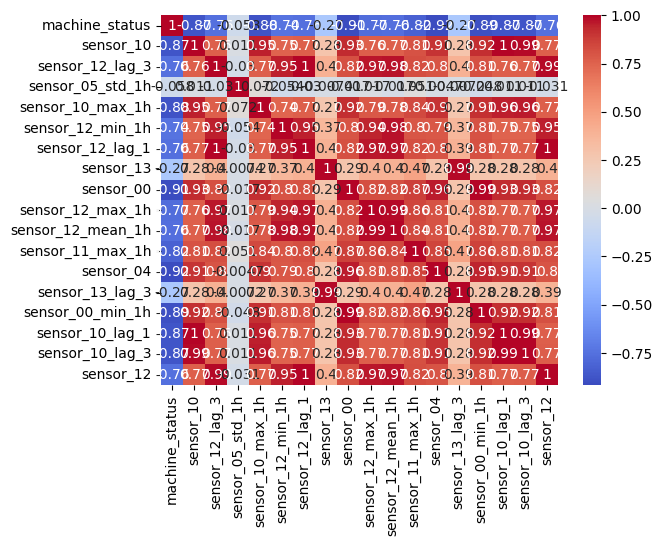

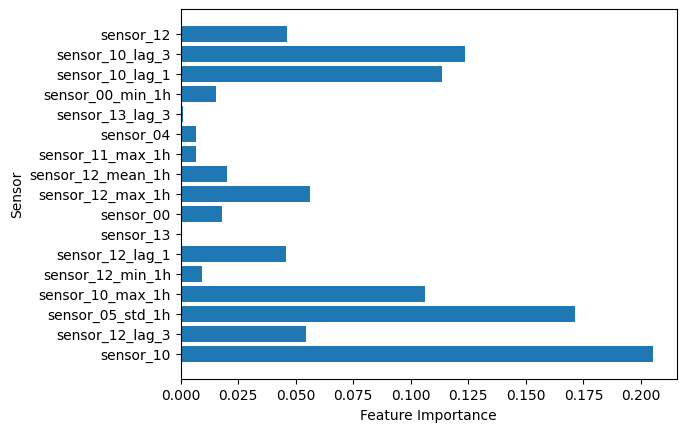

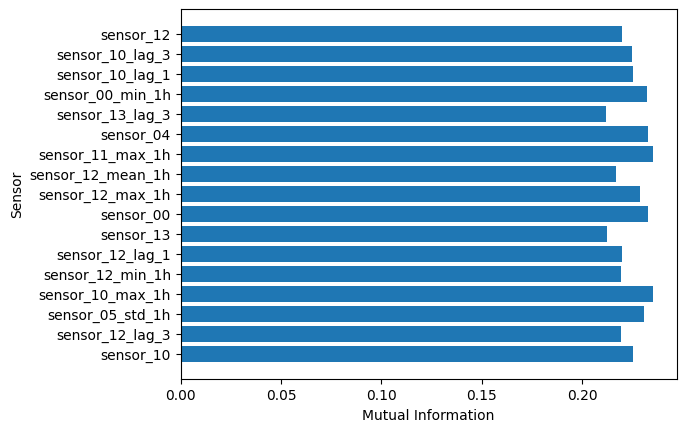

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import featurex

data = pd.read_csv('data/sensor_engineered.csv')

data = data[featurex.columns]
status_mapping = {'NORMAL': 0, 'BROKEN': 1 }
data['machine_status'] = data['machine_status'].map(status_mapping)

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=[np.number])
correlations = numeric_data.corr()

# Focus on correlations with 'machine_status'
machine_status_corr = correlations['machine_status'].sort_values(ascending=False)

# Print or view the correlation values
print(machine_status_corr)

# Plotting the correlations can be helpful
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

# Convert data to format suitable for sklearn models
# Assuming 'sensor_columns' contains relevant sensor names
X = data[featurex.sensors]
y = data['machine_status']

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_

# Plot feature importance
plt.barh(featurex.sensors, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Sensor")
plt.show()


mi = mutual_info_classif(X, y)

# Plot mutual information
plt.barh(featurex.sensors, mi)
plt.xlabel("Mutual Information")
plt.ylabel("Sensor")
plt.show()

sensor_00   -0.912453
sensor_01   -0.672664
sensor_02   -0.791340
sensor_03   -0.646236
sensor_04   -0.916251
sensor_05   -0.434675
sensor_06   -0.851497
sensor_07   -0.813105
sensor_08   -0.776232
sensor_09   -0.758571
sensor_10   -0.872526
sensor_11   -0.823495
sensor_12   -0.758787
sensor_13   -0.269843
sensor_14    0.091686
sensor_16    0.089174
sensor_17    0.074688
sensor_18    0.065763
sensor_19    0.088124
sensor_20    0.087021
sensor_21    0.084428
sensor_22    0.079461
sensor_23    0.095611
sensor_24    0.098794
sensor_25    0.078188
sensor_26    0.076001
sensor_27    0.032568
sensor_28    0.203300
sensor_29    0.053315
sensor_30    0.114708
sensor_31    0.158500
sensor_32    0.136392
sensor_33    0.104581
sensor_34   -0.039534
sensor_35    0.091169
sensor_36   -0.019252
sensor_37    0.068008
sensor_38   -0.360624
sensor_39   -0.024335
sensor_40   -0.375201
sensor_41   -0.103536
sensor_42    0.007369
sensor_43   -0.118501
sensor_44   -0.235747
sensor_45   -0.202554
sensor_46 

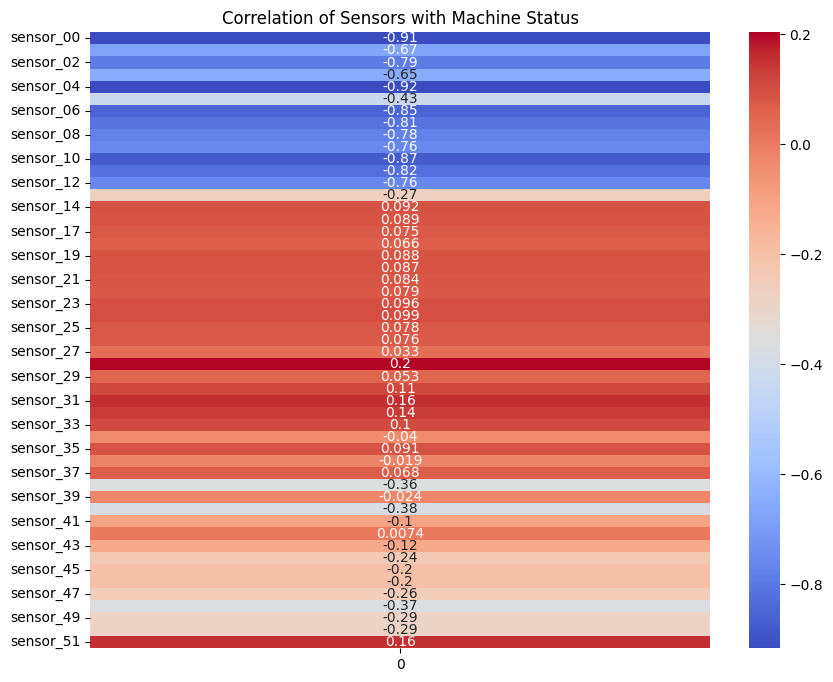

                 timestamp  sensor_00  sensor_01  sensor_02  sensor_03  \
17155  2018-04-12 21:55:00   0.000000   53.34201  52.821180  43.402775   
17156  2018-04-12 21:56:00   0.000000   53.55902  52.777770  43.402775   
17157  2018-04-12 21:57:00   0.000000   53.55902  52.777770  43.402775   
17158  2018-04-12 21:58:00   0.000000   52.77777  52.690970  43.402770   
17159  2018-04-12 21:59:00   0.000000   52.60416  52.734370  43.446180   
...                    ...        ...        ...        ...        ...   
166511 2018-07-25 15:11:00   0.310880   46.48438  51.171870  46.527775   
166512 2018-07-25 15:12:00   0.304977   46.39757  51.085070  46.527770   
166513 2018-07-25 15:13:00   0.303993   46.31076  51.085070  46.484380   
166514 2018-07-25 15:14:00   0.301042   46.18055  51.041664  46.484380   
166515 2018-07-25 15:15:00   0.301042   46.09375  50.998260  46.440970   

         sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  ...  \
17155   202.526031   49.79289   3.219039